In [1]:
import glob
import math
import os
import subprocess
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

sns.set()
print(os.getcwd())

/home/mgarg/src/plexe/examples/sumo_simulation


In [2]:
SCENARIO_DIR = os.path.abspath(os.path.join(os.getcwd(), "analysis"))
RESULTS_DIR = f'{SCENARIO_DIR}/results'
SCENARIO = "HighTraffic"
DB_PATH = f'{RESULTS_DIR}/{SCENARIO}.db'
PLOT_HEIGHT = 4
PLOT_ASPECT = 2

In [13]:
import sqlite3

db_uri = f"file://{os.path.abspath(os.path.expanduser(DB_PATH))}?mode=ro"
sql = '''select * from results where run_id in (4, 6) and seconds >= 25200 and seconds < 27000;'''
#sql = '''select * from results where seconds >= 25200 and seconds < 27000;'''
conn = sqlite3.connect(db_uri, uri=True)
df = pd.read_sql(sql, conn)

NameError: name 'DB_PATH' is not defined

In [14]:
df.sample(10)

NameError: name 'df' is not defined

In [15]:
SCENARIO_DIR = os.path.abspath(os.path.join(os.getcwd(), "analysis"))
RESULTS_DIR = f'{SCENARIO_DIR}/results'
SCENARIO = "HighTraffic_PLOEG_mpr_0.4_fer_0.7"
DB_PATH = f'{RESULTS_DIR}/{SCENARIO}.db'
PLOT_HEIGHT = 4
PLOT_ASPECT = 2

In [16]:
import sqlite3

db_uri = f"file://{os.path.abspath(os.path.expanduser(DB_PATH))}?mode=ro"
sql = '''select * from results where run_id in (4, 7) and seconds >= 25200 and seconds < 27000;'''
#sql = '''select * from results where seconds >= 25200 and seconds < 27000;'''
conn = sqlite3.connect(db_uri, uri=True)
df2 = pd.read_sql(sql, conn)

NameError: name 'pd' is not defined

In [17]:
df2.sample(10)

NameError: name 'df2' is not defined

In [18]:
df2.shape

NameError: name 'df2' is not defined

In [10]:
df2.columns

NameError: name 'df2' is not defined

In [11]:
df3=df.append(df2)

NameError: name 'df' is not defined

In [19]:
df3.shape

NameError: name 'df3' is not defined

In [1]:
df3.sample(20)

NameError: name 'df3' is not defined

In [15]:
# node_ids = df.node_id.sample(100)
# sample = df[df.run_id==8][df.node_id.isin(node_ids)]
# sns.relplot(data=sample, x='seconds', y='appl_distanceTravelled', kind='line', hue='node_id', row="run_id", col='appl_laneIdx', ci=None, estimator=None, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2)

In [16]:
# sns.relplot(x='seconds', y='appl_speed', kind='line', row="run_id", data=df, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

In [17]:
# sns.relplot(x='seconds', y='appl_acceleration', kind='line', row="run_id", data=df, height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

In [60]:
# g = sns.FacetGrid(df, row="run_id", height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2)
# g.map(sns.distplot, "appl_speed")
# g.add_legend()

In [17]:
def do_comparison(a_name, a_data, b_name, b_data, attrs, p=0.05):
    for attr in attrs:
        sr = stats.ks_2samp(a_data[attr], b_data[attr])
        fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT))
        axes[0].set_title(a_name)
        axes[1].set_title(b_name)
        fig.suptitle(f"statistic={sr.statistic:.3f} p={sr.pvalue:.3f} (two-tailed)")
        sns.distplot(a_data[attr].dropna(), ax=axes[0])
        sns.distplot(b_data[attr].dropna(), ax=axes[1])

In [8]:
df.groupby(df.run_id)[['controller','mpr','frame_error_rate']].first()

controller  mpr  frame_error_rate
run_id                                  
0          "CACC"  0.0               0.0
4          "CACC"  0.2               0.0
5          "CACC"  0.2               0.5

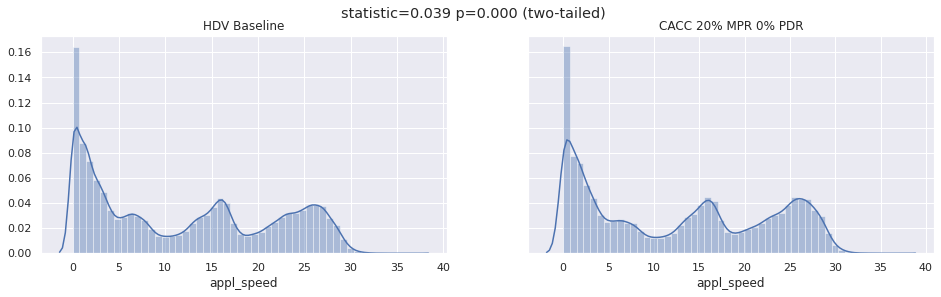

In [18]:
# Comparison of baseline HDV scenarios at low traffic shows higher speeds from CACC controller.
do_comparison("HDV Baseline", df3[df3.run_id==10], "CACC 20% MPR 0% PDR", df3[df3.run_id==11], ['appl_speed'])

In [16]:
# do_comparison("HDV Baseline", df[df.run_id==0], "PLOEG 20% MPR 0% PDR", df[df.run_id==6], ['appl_speed'])

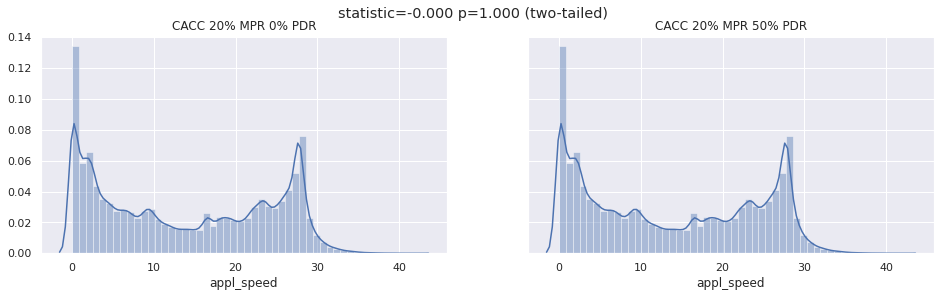

In [18]:
# packet drop rate has no effect on vehicle speed
do_comparison("CACC 20% MPR 0% PDR", df[df.run_id==4], "CACC 20% MPR 50% PDR", df[df.run_id==5], ['appl_speed'])

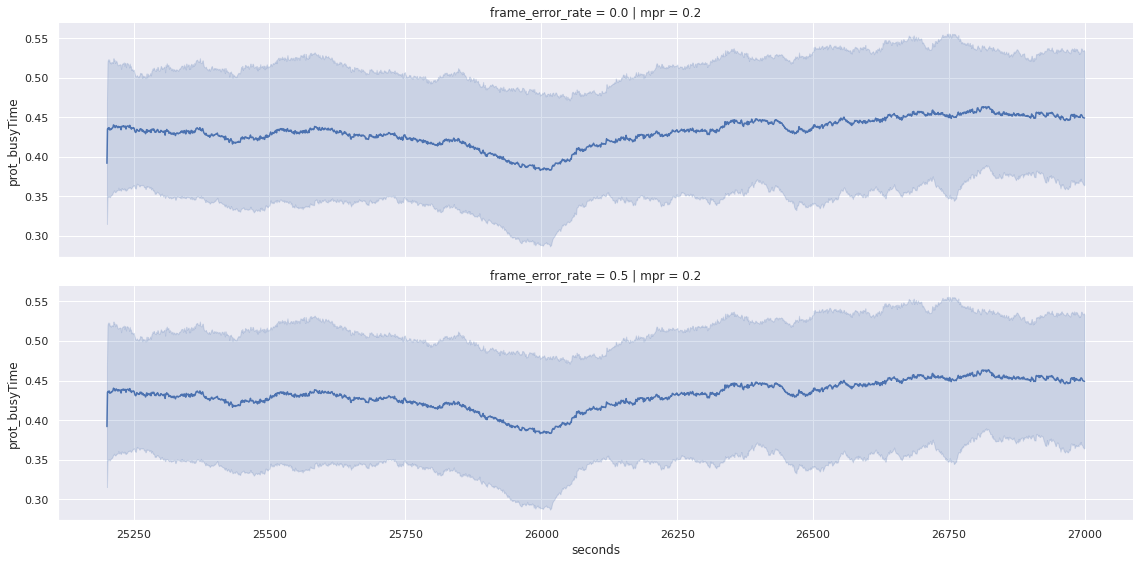

In [20]:
sns.relplot(x='seconds', y='prot_busyTime', kind='line', row="frame_error_rate", col="mpr", data=df[df.mpr==0.2][df.controller=="\"CACC\""], height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

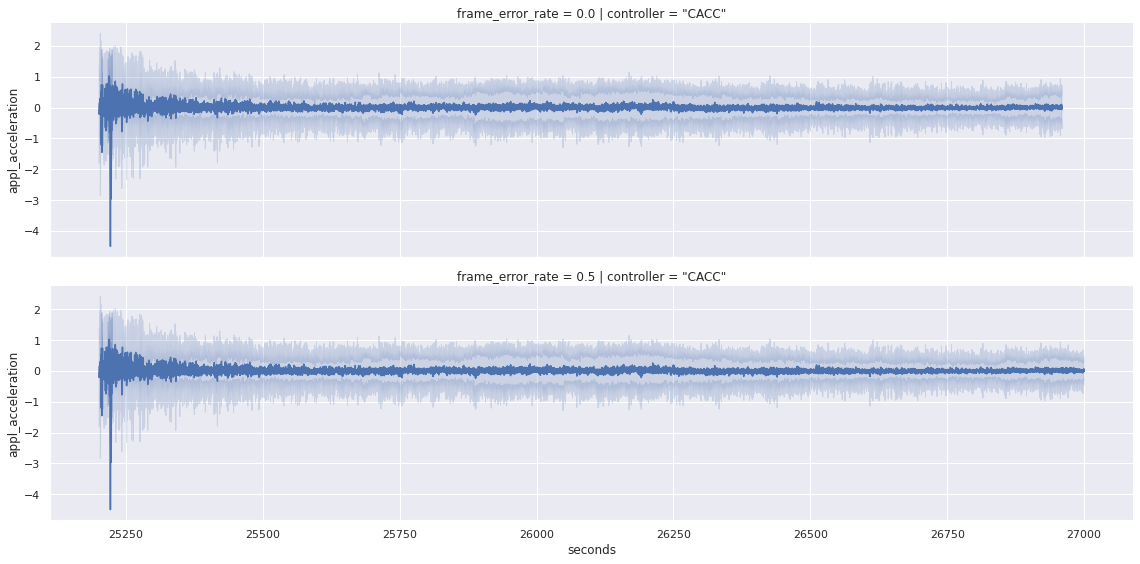

In [81]:
sns.relplot(x='seconds', y='appl_acceleration', kind='line', row="frame_error_rate", col="controller", data=df[df.run_id.isin([8,9])], height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

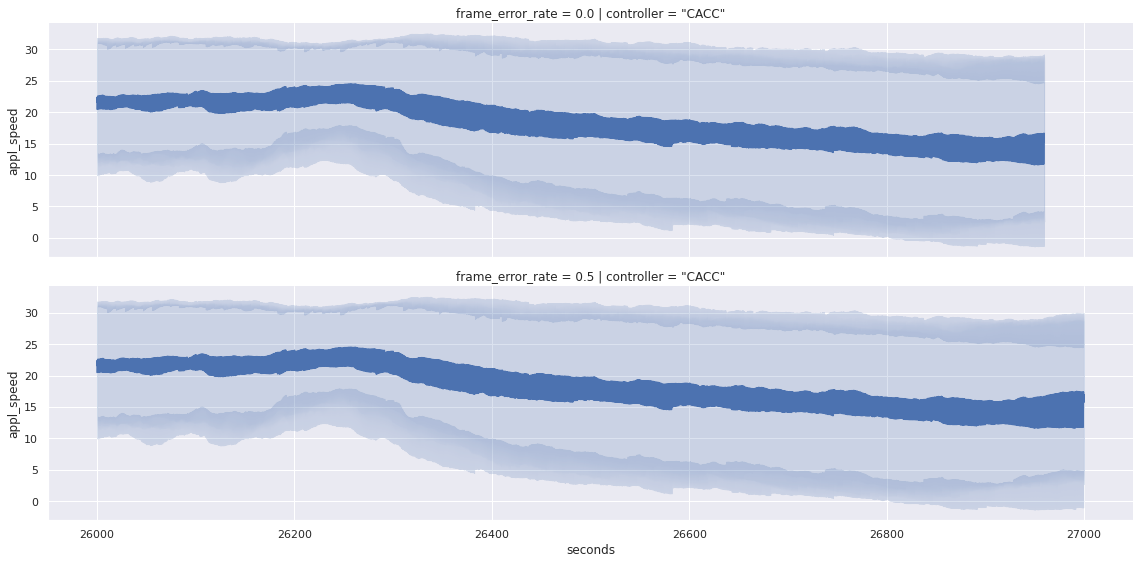

In [83]:
sns.relplot(x='seconds', y='appl_speed', kind='line', row="frame_error_rate", col="controller", data=df[df.run_id.isin([8,9])][df.seconds>=26000], height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

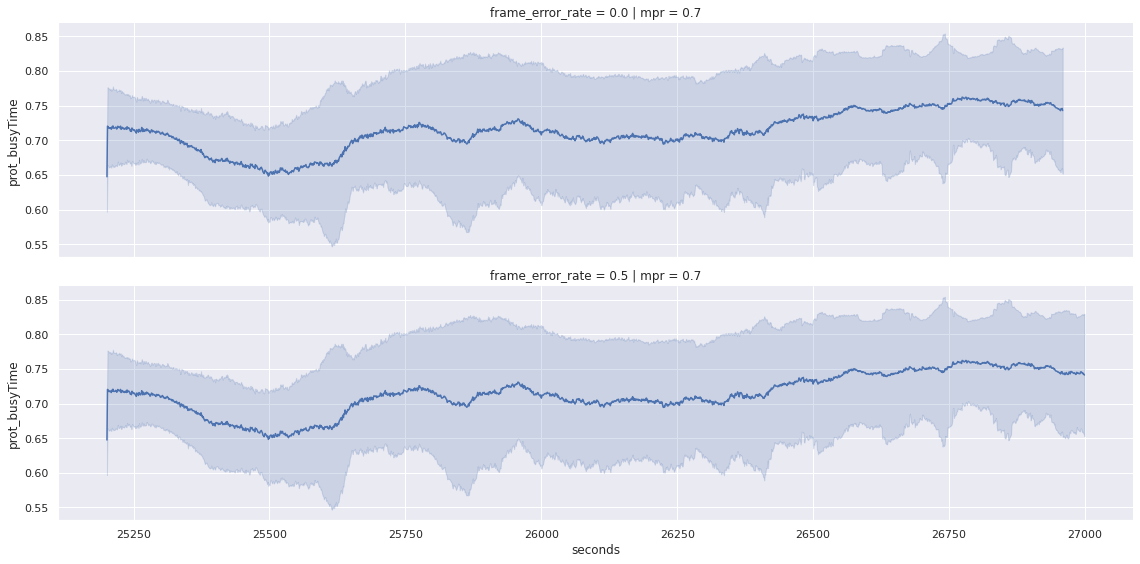

In [23]:
sns.relplot(x='seconds', y='prot_busyTime', kind='line', row="frame_error_rate", col="mpr", data=df[df.mpr==0.7][df.controller=="\"CACC\""], height=PLOT_HEIGHT, aspect=PLOT_ASPECT*2, ci='sd')

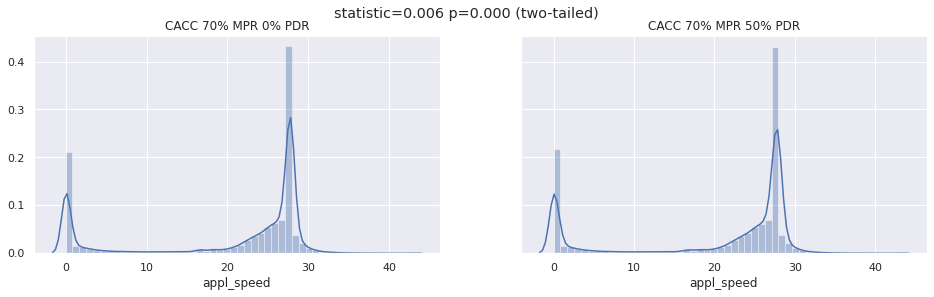

In [59]:
do_comparison("CACC 70% MPR 0% PDR", df[df.run_id==8], "CACC 70% MPR 50% PDR", df[df.run_id==9], ['appl_speed'])

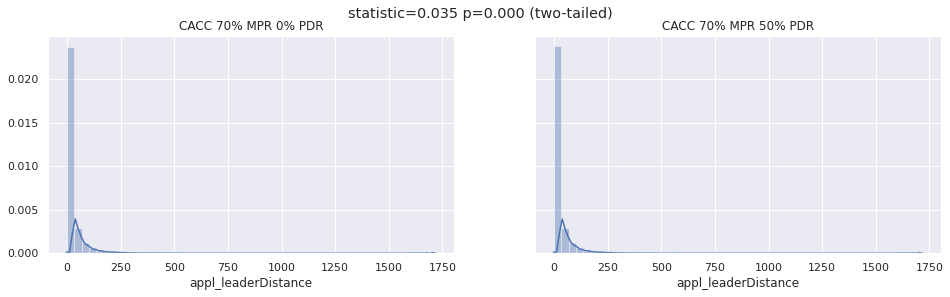

In [79]:
do_comparison("CACC 70% MPR 0% PDR", df[df.run_id==8], "CACC 70% MPR 50% PDR", df[df.run_id==9], ['appl_leaderDistance'])

In [13]:
# do_comparison("PLOEG 20% MPR 0% PDR", df[df.run_id==6], "PLOEG 20% MPR 50% PDR", df[df.run_id==7], ['appl_speed'])

In [14]:
# do_comparison("PLOEG 20% MPR 0% PDR", df[df.run_id==10], "PLOEG 20% MPR 50% PDR", df[df.run_id==11], ['appl_speed'])

In [30]:
# Class for reading the edgedata emitted by sql2edgedata.py
import xml
from xml.sax.handler import ContentHandler

class EdgeDataReader(ContentHandler):
    def __init__(self):
        self._start = None
        self._end = None
        self.data = []
    
    def startElement(self, name, attrs):
        if name == "interval":
            self._start = float(attrs.get("begin"))
            self._end = float(attrs.get("end"))
        if name == "edge":
            self.data.append({
                'edge_id':             attrs.get("id"),
                'speed':               float(attrs.get("speed")),
                'length':              float(attrs.get("length")),
                'avg_speed':           float(attrs.get("avg_speed")),
                'min_speed':           float(attrs.get("min_speed")),
                'max_speed':           float(attrs.get("max_speed")),
                'stdev_speed':         float(attrs.get("stdev_speed")) if attrs.get("stdev_speed") else np.nan,
                'travelrate':          float(attrs.get("travelrate")),
                'congestion_index':    float(attrs.get("congestion_index")),
            })

In [31]:
import re
from copy import deepcopy

runid_mpr = [0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.7, 0.7, 0.7, 0.7]
runid_controller = ["HDV", "HDV", "HDV", "HDV", "CACC", "CACC", "PLOEG", "PLOEG", "CACC", "CACC", "PLOEG", "PLOEG"]
runid_fer = [0.0, 0.5] * 6
xp = xml.sax.make_parser()
xp.setFeature(xml.sax.handler.feature_namespaces, 0)
r = EdgeDataReader()
xp.setContentHandler(r)
ptrn = re.compile(r"^.*?edgedata_[^_]+_(\d+)_.*.xml$")
edgedata = list()
for f in glob.glob('../results/edgedata_HighTraffic_*.xml'):
    run_id = int(ptrn.match(f).group(1))
    xp.parse(f)
    for d in r.data:
        d1 = {
            'run_id': run_id,
            'mpr': runid_mpr[run_id],
            'controller': runid_controller[run_id],
            'frame_error_rate': runid_fer[run_id],
        }
        d1.update(d)
        edgedata.append(d1)
    r.data.clear()

In [48]:
edge_df = pd.DataFrame.from_dict(edgedata)
edge_df.sample(10)

run_id  mpr controller  frame_error_rate                        edge_id  \
1168      11  0.7      PLOEG               0.5    325686453#5-AddedOnRampEdge   
1905       5  0.2       CACC               0.5                   :246635768_0   
1732       5  0.2       CACC               0.5   325686453#1-AddedOffRampEdge   
27         9  0.7       CACC               0.5  123961236#13-AddedOffRampEdge   
1749       5  0.2       CACC               0.5                      123969747   
1517      10  0.7      PLOEG               0.0                  :1003605767_0   
897        6  0.2      PLOEG               0.0   325686453#1-AddedOffRampEdge   
189        9  0.7       CACC               0.5                   :243050272_0   
2043       4  0.2       CACC               0.0                   :243050307_1   
1792       5  0.2       CACC               0.5                    128497230#0   

      speed  length  avg_speed  min_speed  max_speed  stdev_speed  travelrate  \
1168  27.78   92.02  26.468699   0.002181  34.461291     3.507911    0.629687   
1905   8.97    4.33  16.022802  10.421428  23.539434     2.218398    1.040205   
1732  27.78   92.01  26.713784   1.957543  36.107976     2.701037    0.623910   
27    27.78   92.03   3.150777   0.000000  28.127424     6.563628    5.289806   
1749  27.78  788.86  25.964246  16.682599  34.323932     2.063424    0.641921   
1517   6.60    7.19   8.304255   2.334491  12.404252     2.318479    2.007043   
897   27.78   92.01  26.713784   1.957543  36.107976     2.701037    0.623910   
189   19.08    5.05  22.905668   4.519063  27.778197     5.206399    0.727636   
2043  27.78    8.06   7.847572   0.000000  23.246371     6.506755    2.123842   
1792  16.67  152.36  16.800526   4.800882  27.875236     3.489687    0.992052   

      congestion_index  
1168          0.049542  
1905         -0.440173  
1732          0.039913  
27            7.816872  
1749          0.069933  
1517         -0.205227  
897           0.039913  
189          -0.167018  
2043          2.539949  
1792         -0.007769

In [33]:
edge_df.groupby(edge_df.run_id)[['controller','mpr','frame_error_rate']].first()

controller  mpr  frame_error_rate
run_id                                  
0             HDV  0.0               0.0
4            CACC  0.2               0.0
5            CACC  0.2               0.5
6           PLOEG  0.2               0.0
7           PLOEG  0.2               0.5
8            CACC  0.7               0.0
9            CACC  0.7               0.5
10          PLOEG  0.7               0.0
11          PLOEG  0.7               0.5

In [73]:
edge_df.groupby(['controller', 'mpr', 'frame_error_rate'])['travelrate'].mean()

controller  mpr  frame_error_rate
CACC        0.2  0.0                 1.181029
                 0.5                 1.181029
            0.7  0.0                 1.002173
                 0.5                 0.996866
HDV         0.0  0.0                 2.787145
PLOEG       0.2  0.0                 1.181029
                 0.5                 1.181029
            0.7  0.0                 0.996866
                 0.5                 0.996866
Name: travelrate, dtype: float64

In [60]:
edge_df.groupby(['controller', 'mpr', 'frame_error_rate'])['congestion_index'].mean()

controller  mpr  frame_error_rate
CACC        0.2  0.0                 0.769563
                 0.5                 0.769563
            0.7  0.0                 0.495074
                 0.5                 0.485318
HDV         0.0  0.0                 2.916537
PLOEG       0.2  0.0                 0.769563
                 0.5                 0.769563
            0.7  0.0                 0.485318
                 0.5                 0.485318
Name: congestion_index, dtype: float64

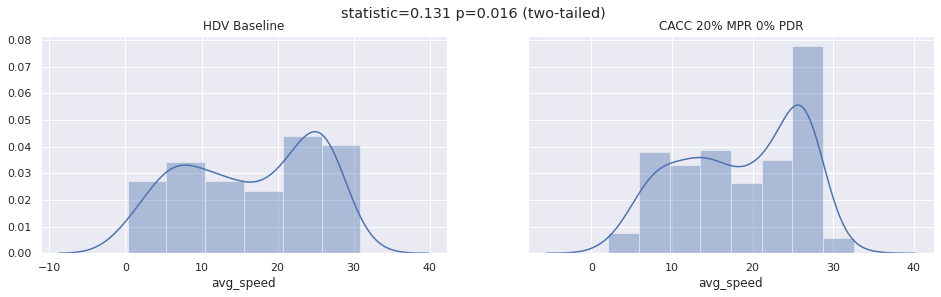

In [35]:
do_comparison("HDV Baseline", edge_df[edge_df.run_id==0], "CACC 20% MPR 0% PDR", edge_df[edge_df.run_id==4], ['avg_speed'])

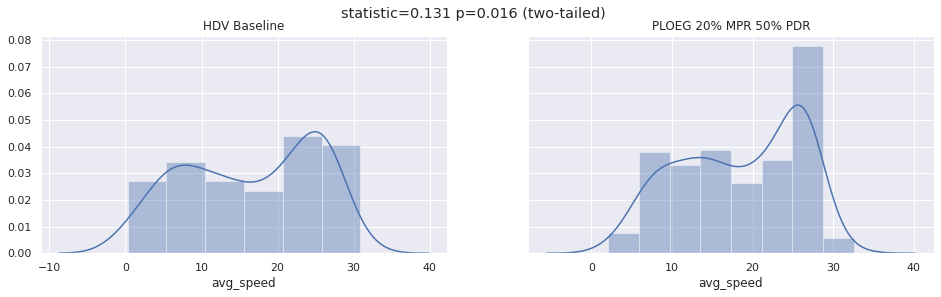

In [36]:
do_comparison("HDV Baseline", edge_df[edge_df.run_id==0], "PLOEG 20% MPR 50% PDR", edge_df[edge_df.run_id==6], ['avg_speed'])

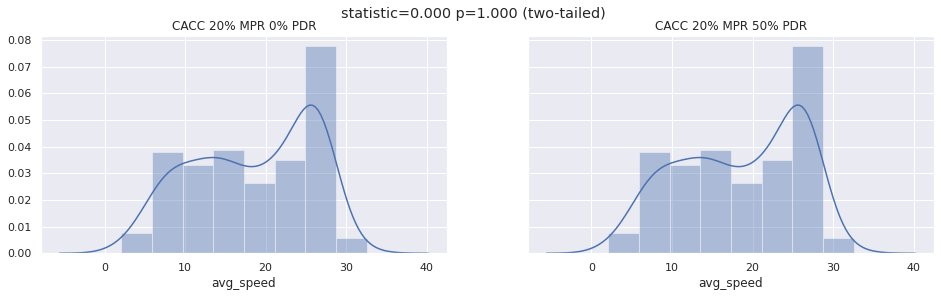

In [37]:
do_comparison("CACC 20% MPR 0% PDR", edge_df[edge_df.run_id==4], "CACC 20% MPR 50% PDR", edge_df[edge_df.run_id==5], ['avg_speed'])

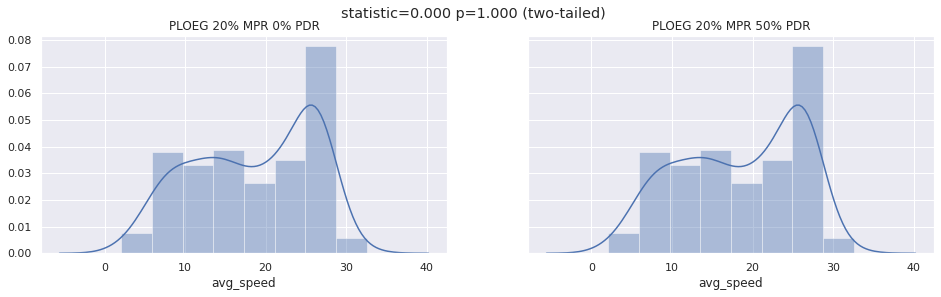

In [38]:
do_comparison("PLOEG 20% MPR 0% PDR", edge_df[edge_df.run_id==6], "PLOEG 20% MPR 50% PDR", edge_df[edge_df.run_id==7], ['avg_speed'])

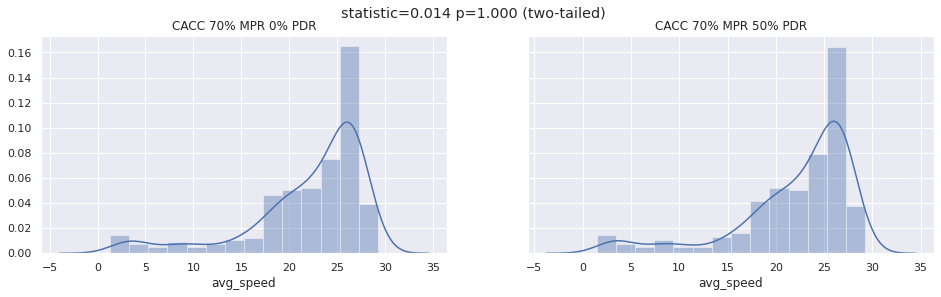

In [39]:
do_comparison("CACC 70% MPR 0% PDR", edge_df[edge_df.run_id==8], "CACC 70% MPR 50% PDR", edge_df[edge_df.run_id==9], ['avg_speed'])

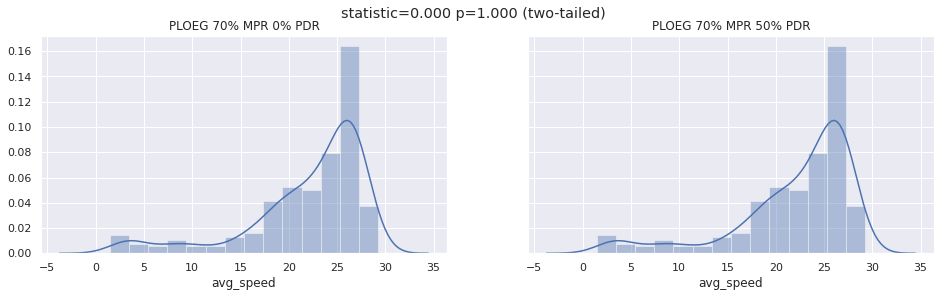

In [40]:
do_comparison("PLOEG 70% MPR 0% PDR", edge_df[edge_df.run_id==10], "PLOEG 70% MPR 50% PDR", edge_df[edge_df.run_id==11], ['avg_speed'])

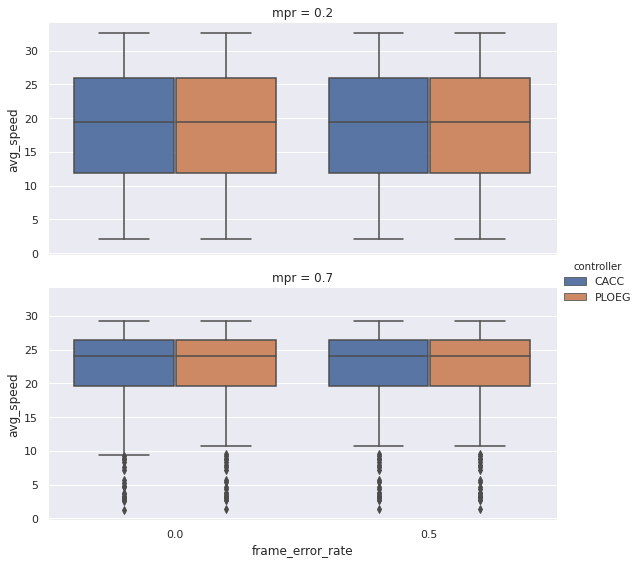

In [49]:
g = sns.catplot(data=edge_df[edge_df.mpr>0], x="frame_error_rate", y="avg_speed", hue="controller", row="mpr", kind="box", height=PLOT_HEIGHT, aspect=PLOT_ASPECT)

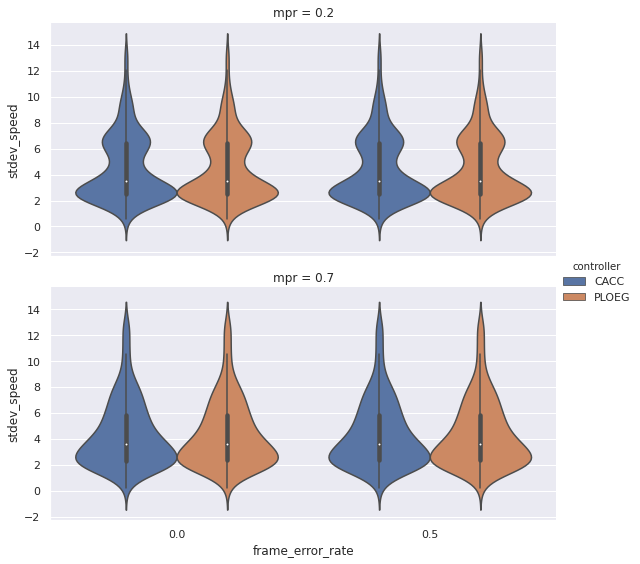

In [54]:
g = sns.catplot(data=edge_df[edge_df.mpr>0], x="frame_error_rate", y="stdev_speed", hue="controller", row="mpr", kind="violin", height=PLOT_HEIGHT, aspect=PLOT_ASPECT)

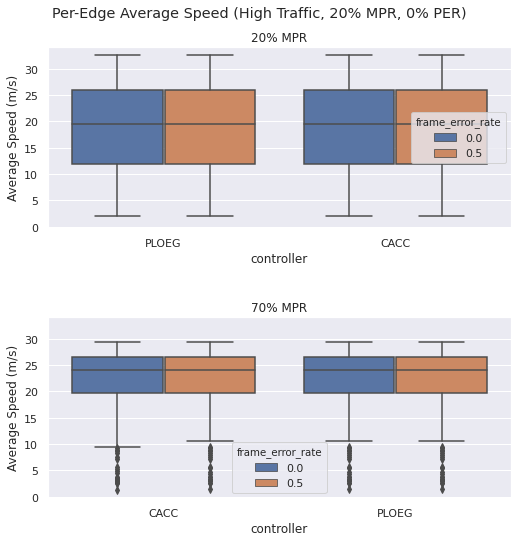

In [100]:
fig, axes = plt.subplots(2, 1, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT, PLOT_HEIGHT*2))
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.mpr==0.2], y="avg_speed", x="controller", hue="frame_error_rate", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.mpr==0.7], y="avg_speed", x="controller", hue="frame_error_rate", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (High Traffic, 20% MPR, 0% PER)")
axes[0].set(ylabel="Average Speed (m/s)", title="20% MPR")
axes[1].set(ylabel="Average Speed (m/s)", title="70% MPR")
fig.tight_layout(pad=3.0)

[Text(0, 0.5, 'Average Speed (m/s)')]

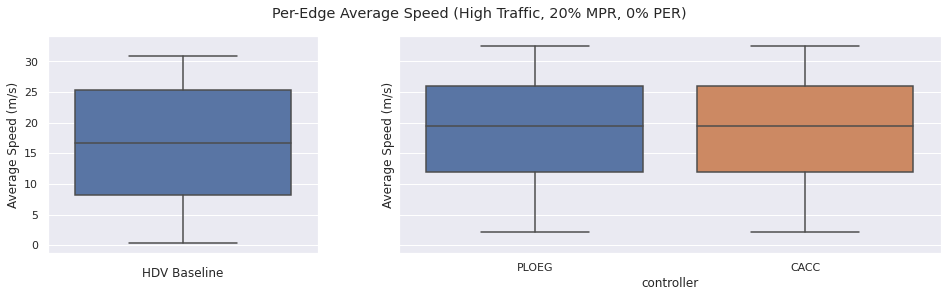

In [84]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT), gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(data=edge_df[edge_df.controller=="HDV"], y="avg_speed", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.frame_error_rate==0][edge_df.mpr==0.2], y="avg_speed", x="controller", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (High Traffic, 20% MPR, 0% PER)")
axes[0].set(xlabel="HDV Baseline", ylabel="Average Speed (m/s)")
axes[1].set(ylabel="Average Speed (m/s)")

[Text(0, 0.5, 'Average Speed (m/s)')]

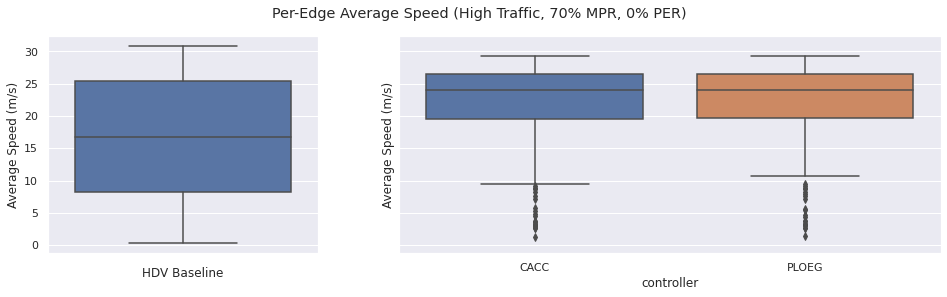

In [85]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT), gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(data=edge_df[edge_df.controller=="HDV"], y="avg_speed", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.frame_error_rate==0][edge_df.mpr==0.7], y="avg_speed", x="controller", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (High Traffic, 70% MPR, 0% PER)")
axes[0].set(xlabel="HDV Baseline", ylabel="Average Speed (m/s)")
axes[1].set(ylabel="Average Speed (m/s)")

[Text(0, 0.5, 'Average Speed (m/s)')]

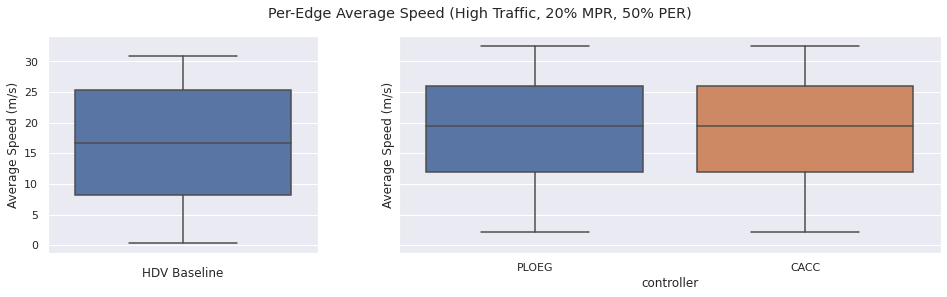

In [86]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT), gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(data=edge_df[edge_df.controller=="HDV"], y="avg_speed", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.frame_error_rate==0.5][edge_df.mpr==0.2], y="avg_speed", x="controller", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (High Traffic, 20% MPR, 50% PER)")
axes[0].set(xlabel="HDV Baseline", ylabel="Average Speed (m/s)")
axes[1].set(ylabel="Average Speed (m/s)")

[Text(0, 0.5, 'Average Speed (m/s)')]

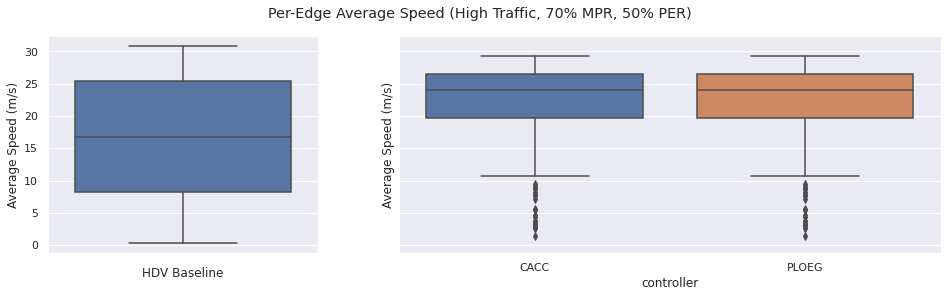

In [87]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(PLOT_HEIGHT*PLOT_ASPECT*2, PLOT_HEIGHT), gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(data=edge_df[edge_df.controller=="HDV"], y="avg_speed", ax=axes[0])
sns.boxplot(data=edge_df[edge_df.controller!="HDV"][edge_df.frame_error_rate==0.5][edge_df.mpr==0.7], y="avg_speed", x="controller", ax=axes[1])
fig.suptitle("Per-Edge Average Speed (High Traffic, 70% MPR, 50% PER)")
axes[0].set(xlabel="HDV Baseline", ylabel="Average Speed (m/s)")
axes[1].set(ylabel="Average Speed (m/s)")